# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, ShuffleSplit, KFold
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
import catboost as cb
from catboost import CatBoostRegressor

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data reading

In [4]:
data = pd.read_csv('data/prepared_data.csv')

In [5]:
data_dummy = pd.get_dummies(data)

In [7]:
X_dummy_data = data_dummy.drop(columns=['price'])
y_dummy_data = data_dummy['price']

In [8]:
X_data = data.drop(columns=['price'])
y_data = data['price']

# Models making brrrrrrrrrrrrrr

RF

In [10]:
rf_r2_scores = []

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1488)
for train_index, test_index in rkf.split(X_dummy_data):
    X_train, X_test = X_dummy_data.iloc[train_index], X_dummy_data.iloc[test_index]
    y_train, y_test = y_dummy_data.iloc[train_index], y_dummy_data.iloc[test_index]
    clf = RandomForestRegressor(n_estimators=100)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    rf_r2_scores.append(r2_score(y_test, preds))

LR

In [21]:
lr_r2_scores = []

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1488)
for train_index, test_index in rkf.split(X_dummy_data):
    X_train, X_test = X_dummy_data.iloc[train_index], X_dummy_data.iloc[test_index]
    y_train, y_test = y_dummy_data.iloc[train_index], y_dummy_data.iloc[test_index]
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    lr_r2_scores.append(r2_score(y_test, preds))

Kotikbustik

In [25]:
catboost_r2_scores = []
cat_features_indecies = [6, 7, 8, 9, 10]

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1488)
for train_index, test_index in rkf.split(X_data):
    X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]
    train_dataset = cb.Pool(X_train, y_train, cat_features=cat_features_indecies) 
    test_dataset = cb.Pool(X_test, y_test, cat_features=cat_features_indecies)
    model = CatBoostRegressor(iterations=34,
                          learning_rate=0.05,
                          depth=10,
                          loss_function='RMSE')
    model.fit(train_dataset)
    preds = model.predict(test_dataset)
    catboost_r2_scores.append(r2_score(y_test, preds))

0:	learn: 2231267.1683059	total: 30.6ms	remaining: 1.01s
1:	learn: 2208896.3349016	total: 55.5ms	remaining: 888ms
2:	learn: 2181224.9360132	total: 82.6ms	remaining: 853ms
3:	learn: 2153850.5202159	total: 111ms	remaining: 834ms
4:	learn: 2126876.2181369	total: 125ms	remaining: 725ms
5:	learn: 2100291.8245365	total: 147ms	remaining: 686ms
6:	learn: 2074040.5858247	total: 170ms	remaining: 655ms
7:	learn: 2048115.3035882	total: 192ms	remaining: 624ms
8:	learn: 2022553.1369501	total: 217ms	remaining: 604ms
9:	learn: 1997404.1657274	total: 242ms	remaining: 582ms
10:	learn: 1972330.7804775	total: 266ms	remaining: 557ms
11:	learn: 1947743.7027333	total: 283ms	remaining: 518ms
12:	learn: 1923456.6597774	total: 323ms	remaining: 522ms
13:	learn: 1899487.8950490	total: 360ms	remaining: 514ms
14:	learn: 1885978.3522730	total: 380ms	remaining: 482ms
15:	learn: 1862535.9076358	total: 407ms	remaining: 458ms
16:	learn: 1839369.3742082	total: 437ms	remaining: 437ms
17:	learn: 1821147.8790532	total: 458m

# Plotting

In [45]:
def dist_plot(scores, subtitles=[]):
    fig, axes = plt.subplots(1, len(scores), figsize=(25, 12))
    axes = axes.flatten()
    for ax, score, subtitle in zip(axes, scores, subtitles):
        score_df = pd.DataFrame(score, columns=['score'])
        score_mean = np.mean(score)
        score_std = np.std(score)
        sns.histplot(score_df, x="score", kde=True, ax=ax)
        ax.text(0.2, 0.95, f'Mean: {np.round(score_mean)}, std: {np.round(score_std)}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.title.set_text(subtitle)
    plt.show()

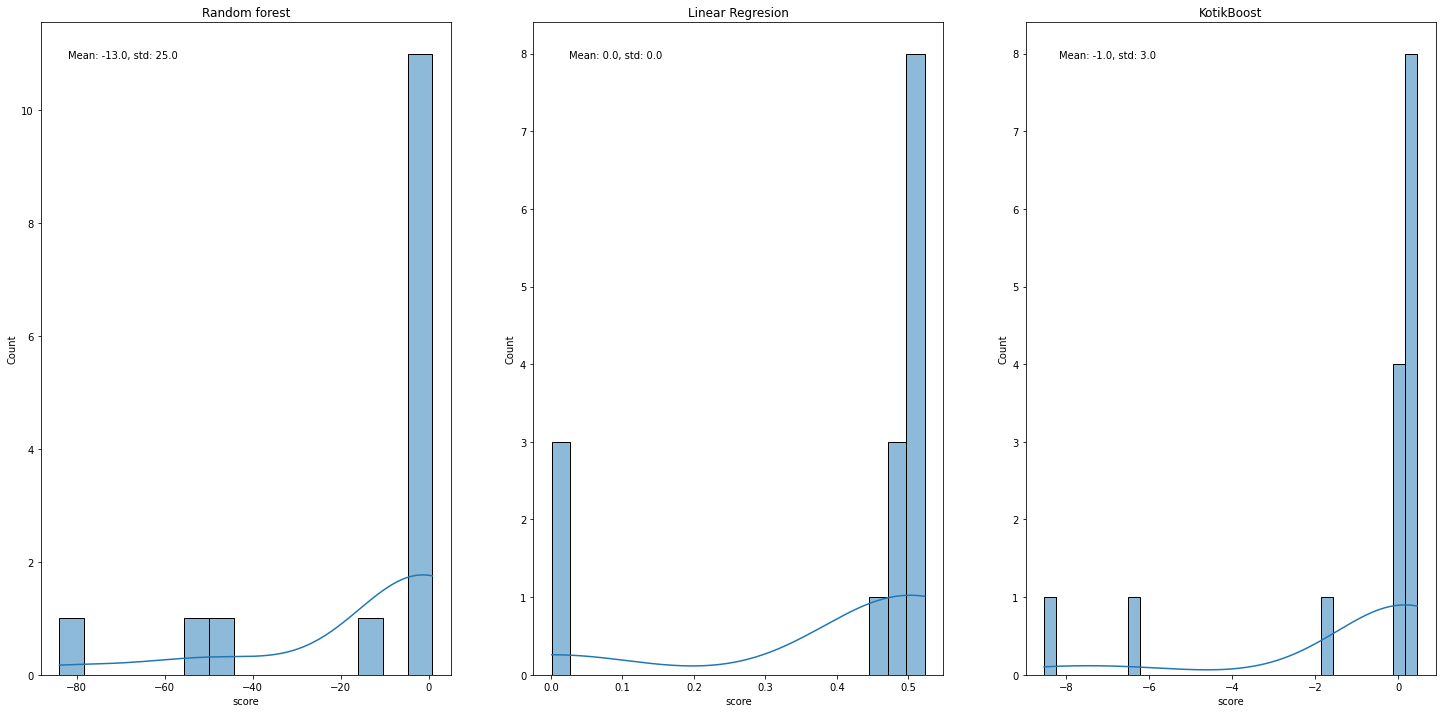

In [46]:
dist_plot([rf_r2_scores, lr_r2_scores, catboost_r2_scores], ['Random forest', 'Linear Regresion', 'KotikBoost'])